# Our Plan

1. import numpy, matplotlib, ipywidgets
2. define the potential energy
3. define meshes for Q1 and Q2 $$\rightarrow$$ meshgrid
4. Plot contour with `contourf`
5. Use `ipywidgets` to create interactive plot

In [92]:
#import needed packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider # import the interact function and the sliders we need for this environemtn

In [93]:
# define potential energy
def potential_energy(Q1, Q2, K1=1.0, K2=1.0, C=0):
    return 0.5*K1*Q1**2 + 0.5*K2*Q2**2 + C* Q1*Q2**2

#test potential_energy
potential_energy(1, 1)

1.0

In [94]:
# define meshes in Q1 and Q2
q1 = np.linspace(-1,1,100)
q2 = q1
Q1, Q2 = np.meshgrid(q1, q2)

# potential_energy(Q1, Q2)

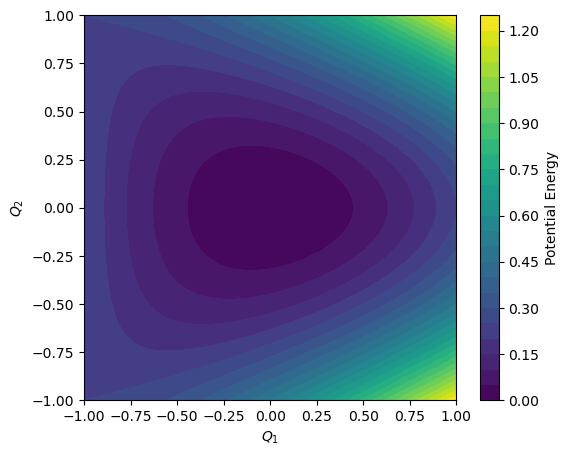

In [95]:
# plot contours with matplotlib contourf
plt.figure(figsize=(6,5)) # Sizing plot

contourf = plt.contourf(Q1, Q2, potential_energy(Q1, Q2, K1=0.5, K2=1, C=.5), levels=25)

cbar = plt.colorbar(contourf)  # Add a color bar
cbar.set_label('Potential Energy')

plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('$Q_1$')
plt.ylabel('$Q_2$')

plt.show()

In [96]:
# define plotting function
def plot_potential(K1=1.0, K2=1.0, C=0, n_contours=10, n_points=50):
    
    # define meshes in Q1 and Q2 and meshgrid
    q1 = np.linspace(-1,1, n_points)
    q2 = q1
    Q1, Q2 = np.meshgrid(q1, q2)
    Z = potential_energy(Q1, Q2, K1, K2, C)

    # construct contour plot
    plt.figure(figsize=(5,4)) #sizing plot
    plt.contourf(Q1, Q2, potential_energy(Q1, Q2, Z), levels=n_contours)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('$Q_1$')
    plt.ylabel('$Q_2$')
    
    plt.show()


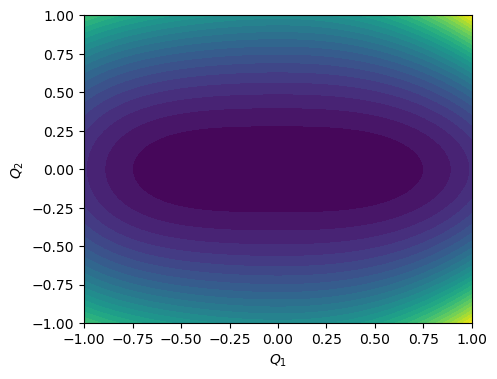

In [98]:
plot_potential(K1=0.5, K2=1.0, C=0.3, n_contours=25, n_points=100)

In [82]:
# interactive plot
widgets.interact(plot_potential,
                K1= widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.05, description='K1'),
                K2= widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.05, description='K2'),
                C= widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.05, description='C'),
                n_contours=widgets.IntSlider(value=15, min=1, max=25, step=1, description='# of Contours'),
                n_points=widgets.IntSlider(value=50, min=1, max=100, step=0.05, description='# of Points'));

interactive(children=(FloatSlider(value=1.0, description='K1', max=2.0, step=0.05), FloatSlider(value=1.0, des…

In [79]:
# print(dir(widgets))
help(widgets.IntSlider)

Help on class IntSlider in module ipywidgets.widgets.widget_int:

class IntSlider(_BoundedInt)
 |  IntSlider(value=None, min=None, max=None, step=None, **kwargs)
 |  
 |  Slider widget that represents an integer bounded from above and below.
 |  
 |  Method resolution order:
 |      IntSlider
 |      _BoundedInt
 |      _Int
 |      ipywidgets.widgets.widget_description.DescriptionWidget
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.valuewidget.ValueWidget
 |      ipywidgets.widgets.widget_core.CoreWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, value=None, min=None, max=None, step=None, **kwargs)
 |      Parameters
 |      ----------
 |      value: integer
 |          The initial value.
 |      min: integer
 |          The lower limit for the value.


In [89]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 